In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import units

In [2]:
#df = pd.ExcelFile('C:/Users/halil/Desktop/soalr_data.xlsx').parse('sheet 1')
weather_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="weather")
guneko_raw = pd.read_excel('C:/Users/halil/Desktop/soalr_data.xlsx',sheet_name="1000255-GUNEKO")

DATA INITILAZING AND CLEANING

In [3]:



guneko_production = guneko_raw[["Date","Production"]]
guneko_gti = guneko_raw[["Date.1","GTI"]]


weather_guneko = weather_raw.loc[weather_raw.name ==1000255]
ali = pd.merge(guneko_production,weather_guneko,left_on="Date",right_on="date")
dataset = ali.drop(["name","date","lat","lon"],axis=1)

ONE HOT ENCODING

In [4]:
dataset= dataset.set_index(["Date"])
year = pd.DataFrame(data=pd.get_dummies(dataset.index.year,prefix="year"))
month = pd.DataFrame(data=pd.get_dummies(dataset.index.month, prefix="month"))
day = pd.DataFrame(data=pd.get_dummies(dataset.index.day,prefix="day"))
hour = pd.DataFrame(data=pd.get_dummies(dataset.index.hour,prefix="hour"))
frames = [year,month,day,hour]
onehot_encoded = ali.join(frames)



FEATURE ENGINEERING

In [5]:
onehot_encoded = onehot_encoded.drop(["Date","name","date","lat","lon"],axis=1)

In [13]:
onehot_encoded

,Production,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.00000,0.348214,0.327,0.000000,0.000000,0.000000,0.942166,0.051020,0.0,0.343797,...,0,0,0,0,0,0,0,0,0,0
1,0.00000,0.330357,0.241,0.000000,0.000000,0.000000,0.974763,0.091837,0.0,0.328849,...,0,0,0,0,0,0,0,0,0,0
2,0.00000,0.316071,0.175,0.000000,0.000000,0.000000,0.985279,0.102041,0.0,0.316891,...,0,0,0,0,0,0,0,0,0,0
3,0.00000,0.308929,0.120,0.000000,0.000000,0.000000,0.985279,0.091837,0.0,0.310912,...,0,0,0,0,0,0,0,0,0,0
4,0.00000,0.282143,0.817,0.000000,0.000000,0.000000,1.000000,0.102041,0.0,0.288490,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19031,0.41041,0.398214,0.822,0.573056,0.676958,0.323005,0.372240,0.377551,0.0,0.439462,...,0,0,0,0,0,0,0,0,0,0
19032,0.00000,0.419643,0.862,0.645313,0.720318,0.385446,0.343849,0.357143,0.0,0.499253,...,0,0,0,0,0,0,0,0,0,0
19033,0.00000,0.430357,0.965,0.525984,0.756413,0.226643,0.348055,0.326531,0.0,0.485800,...,0,0,0,0,0,0,0,0,0,0
19034,0.00000,0.425000,0.992,0.361083,0.665380,0.080047,0.357518,0.244898,0.0,0.458894,...,1,0,0,0,0,0,0,0,0,0


NORMALIZATION OF FEATURES (EXCEPTIONS: PRODUCTION AND DATE TIME ENCODED FEATURES)

In [7]:
def normalize(df,column_list):
    for col in column_list:
        feature_range = (0,1)
        min_max_scaler = MinMaxScaler(feature_range=feature_range)

        df[col] = min_max_scaler.fit_transform(df[col].values.reshape(-1,1))

    return df

In [8]:
normalized = normalize(onehot_encoded,onehot_encoded.columns[0:11])
normalized

,Production,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.00000,0.348214,0.327,0.000000,0.000000,0.000000,0.942166,0.051020,0.0,0.343797,...,0,0,0,0,0,0,0,0,0,0
1,0.00000,0.330357,0.241,0.000000,0.000000,0.000000,0.974763,0.091837,0.0,0.328849,...,0,0,0,0,0,0,0,0,0,0
2,0.00000,0.316071,0.175,0.000000,0.000000,0.000000,0.985279,0.102041,0.0,0.316891,...,0,0,0,0,0,0,0,0,0,0
3,0.00000,0.308929,0.120,0.000000,0.000000,0.000000,0.985279,0.091837,0.0,0.310912,...,0,0,0,0,0,0,0,0,0,0
4,0.00000,0.282143,0.817,0.000000,0.000000,0.000000,1.000000,0.102041,0.0,0.288490,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19031,0.41041,0.398214,0.822,0.573056,0.676958,0.323005,0.372240,0.377551,0.0,0.439462,...,0,0,0,0,0,0,0,0,0,0
19032,0.00000,0.419643,0.862,0.645313,0.720318,0.385446,0.343849,0.357143,0.0,0.499253,...,0,0,0,0,0,0,0,0,0,0
19033,0.00000,0.430357,0.965,0.525984,0.756413,0.226643,0.348055,0.326531,0.0,0.485800,...,0,0,0,0,0,0,0,0,0,0
19034,0.00000,0.425000,0.992,0.361083,0.665380,0.080047,0.357518,0.244898,0.0,0.458894,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from keras.models import Sequential 
from tensorflow.keras import model_conf
from keras.layers import BatchNormalization, Dense, Add 
from keras.layers import Activation, Dropout, Flatten, Dense
def residual_block(x):
  x_skip = x
  x = Dense(model_conf['neuron_size'],activation='relu',kernel_regularizer=model_conf['regulizer'])(x)
  x = BatchNormalization()(x)
  x = Dropout(model_conf['dropout'])(x)

  x = Dense(model_conf['neuron_size'],activation='relu',kernel_regularizer=model_conf['regulizer'])(x)
  x = BatchNormalization()(x)
  x = Dropout(model_conf['dropout'])(x)

  adding = Add()([x_skip,x])
  return Activation('relu')(adding)

In [16]:
train_dataset = normalized.sample(frac=0.8, random_state=0)
test_dataset = normalized.drop(train_dataset.index)

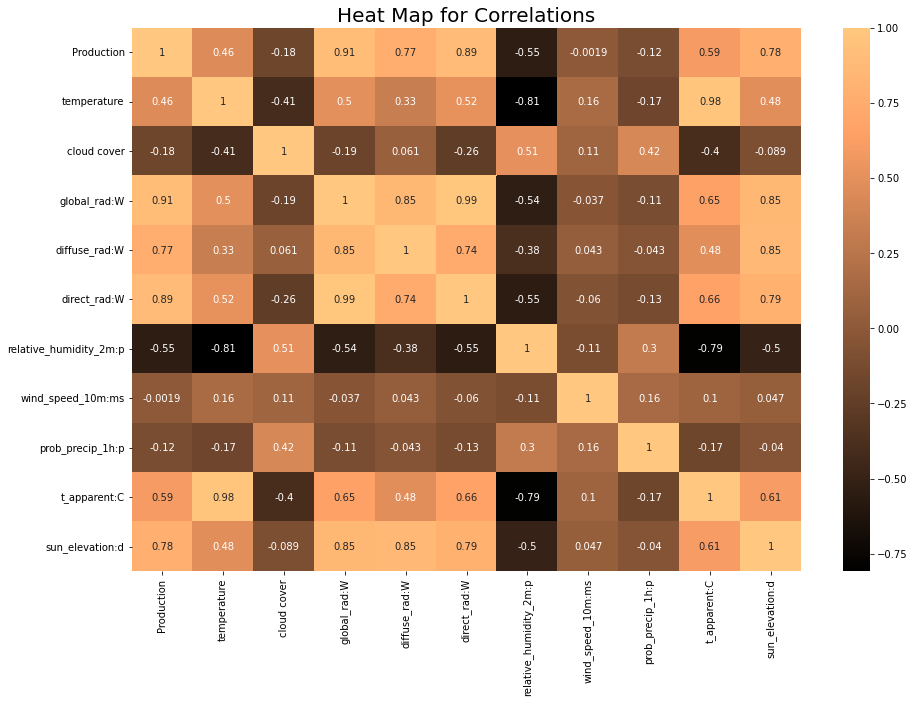

In [45]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(onehot_encoded.iloc[:,:11].corr(), cmap = 'copper',annot = True)
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [31]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Production')
test_labels = test_features.pop('Production')

In [34]:

my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation="relu"),
    tf.keras.layers.Dense(units=1,activation="linear")
])

my_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
    loss='mse')


"""tf.keras.metrics.MeanAbsoluteError
mean squared error """

'tf.keras.metrics.MeanAbsoluteError\nmean squared error '

In [ ]:
history = horsepower_model.fit(
    train_features,
    train_labels,
    epochs=100,
 
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


In [35]:
history = my_model.fit(
    train_features,
    train_labels,
    batch_size=64,
    epochs=50)

Epoch 1/50
238/238 [==============================] - 1s 1ms/step - loss: 0.0146 - mean_absolute_error: 0.0814
Epoch 2/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0080 - mean_absolute_error: 0.0574
Epoch 3/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0069 - mean_absolute_error: 0.0514
Epoch 4/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0063 - mean_absolute_error: 0.0476
Epoch 5/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0059 - mean_absolute_error: 0.0459
Epoch 6/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0440
Epoch 7/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0433
Epoch 8/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0051 - mean_absolute_error: 0.0425
Epoch 9/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0049 - mean_absolute_error: 0.0420
E

In [38]:
train_dataset

,Production,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
4802,0.645646,0.935714,0.000,0.646112,0.267650,0.620540,0.101998,0.265306,0.0,0.893871,...,0,0,1,0,0,0,0,0,0,0
9516,0.116116,0.435714,0.308,0.090945,0.115778,0.046948,0.776025,0.214286,0.0,0.430493,...,0,0,0,1,0,0,0,0,0,0
10694,0.269269,0.369643,0.198,0.384969,0.297616,0.298239,0.670873,0.642857,0.0,0.366218,...,0,0,0,0,0,0,0,0,0,0
11456,0.000000,0.526786,0.085,0.000000,0.000000,0.000000,0.661409,0.132653,0.0,0.493274,...,0,0,0,0,0,0,0,0,0,0
10085,0.634635,0.442857,0.000,0.624325,0.297389,0.579460,0.464774,0.153061,0.0,0.511211,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,0.083083,0.401786,0.015,0.245453,0.221566,0.173709,0.838065,0.112245,0.0,0.424514,...,0,0,0,0,0,0,0,0,0,0
3565,0.000000,0.619643,0.000,0.000000,0.000000,0.000000,0.438486,0.540816,0.0,0.530643,...,0,0,0,0,0,0,0,0,1,0
10565,0.000000,0.358929,0.060,0.000000,0.000000,0.000000,0.790747,0.153061,0.0,0.340807,...,0,0,0,0,0,0,0,0,0,0
14639,0.838839,0.814286,0.030,0.625825,0.267877,0.596479,0.191377,0.214286,0.0,0.786248,...,0,1,0,0,0,0,0,0,0,0


In [46]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor,LinearRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

rfr = RandomForestRegressor()
rfr.fit(train_features, train_labels)




RandomForestRegressor()

In [49]:
train_features

,temperature,cloud cover,global_rad:W,diffuse_rad:W,direct_rad:W,relative_humidity_2m:p,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C,sun_elevation:d,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
4802,0.935714,0.000,0.646112,0.267650,0.620540,0.101998,0.265306,0.0,0.893871,0.784000,...,0,0,1,0,0,0,0,0,0,0
9516,0.435714,0.308,0.090945,0.115778,0.046948,0.776025,0.214286,0.0,0.430493,0.562000,...,0,0,0,1,0,0,0,0,0,0
10694,0.369643,0.198,0.384969,0.297616,0.298239,0.670873,0.642857,0.0,0.366218,0.694000,...,0,0,0,0,0,0,0,0,0,0
11456,0.526786,0.085,0.000000,0.000000,0.000000,0.661409,0.132653,0.0,0.493274,0.381333,...,0,0,0,0,0,0,0,0,0,0
10085,0.442857,0.000,0.624325,0.297389,0.579460,0.464774,0.153061,0.0,0.511211,0.756667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,0.401786,0.015,0.245453,0.221566,0.173709,0.838065,0.112245,0.0,0.424514,0.624667,...,0,0,0,0,0,0,0,0,0,0
3565,0.619643,0.000,0.000000,0.000000,0.000000,0.438486,0.540816,0.0,0.530643,0.353333,...,0,0,0,0,0,0,0,0,1,0
10565,0.358929,0.060,0.000000,0.000000,0.000000,0.790747,0.153061,0.0,0.340807,0.153333,...,0,0,0,0,0,0,0,0,0,0
14639,0.814286,0.030,0.625825,0.267877,0.596479,0.191377,0.214286,0.0,0.786248,0.774000,...,0,1,0,0,0,0,0,0,0,0


In [47]:
y_train_pred = rfr.predict(train_features)
y_test_pred = rfr.predict(test_features)

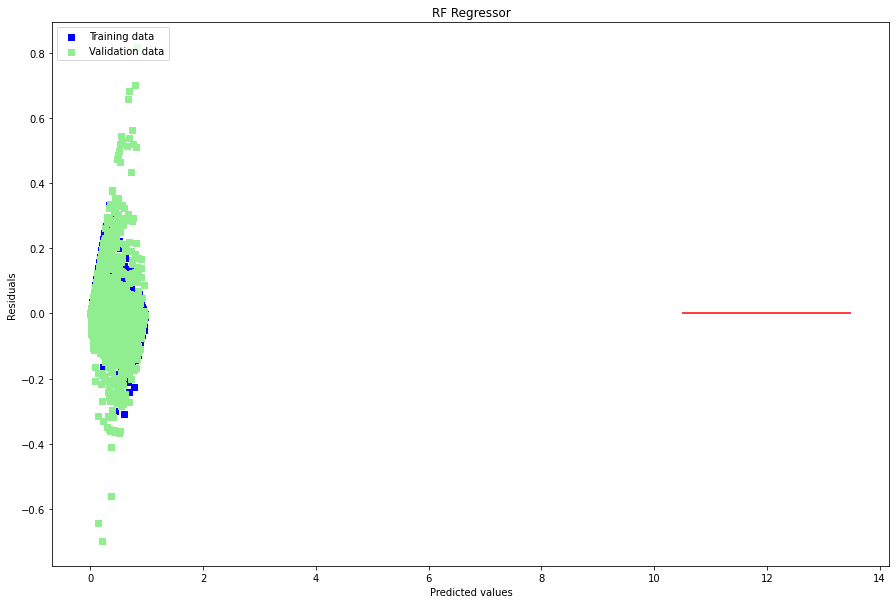

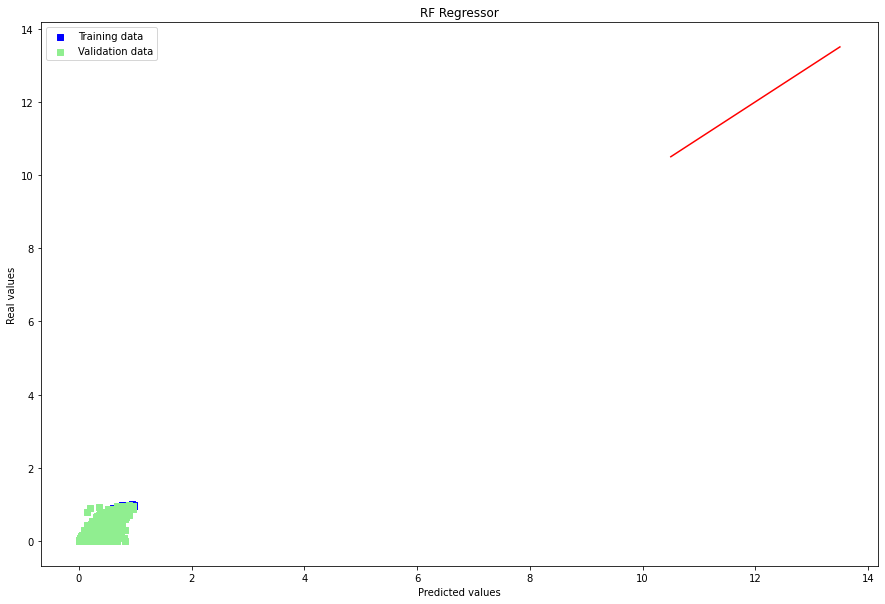

In [48]:
y_train = train_labels
y_test =test_labels

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("RF Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("RF Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()